# <a id='toc1_'></a>[IPL Player Data Analysis](#toc0_)

This report presents a detailed analysis of IPL player performance. Using data visualization and statistical analysis, we examine batting, bowling, and all-round abilities across the given data. By calculating key metrics and performing comparisons, this report identifies top performers, and find patterns in player statistics

**Table of contents**<a id='toc0_'></a>    
- [IPL Player Data Analysis](#toc1_)    
  - [Data Columns Description](#toc1_1_)    
  - [Data Loading and Inspection](#toc1_2_)    
    - [Data Inspection](#toc1_2_1_)    
    - [Preprocessing and cleaning](#toc1_2_2_)    
    - [Additional Information](#toc1_2_3_)    
  - [Exploratory Data Analysis](#toc1_3_)    
    - [Basic Description of data](#toc1_3_1_)    
    - [Distribution of Batsman, Bowler, and All-rounders](#toc1_3_2_)    
    - [Batting Related Visualizations](#toc1_3_3_)    
    - [Bowling Related Visualizations](#toc1_3_4_)    
    - [All-Rounder Related Charts](#toc1_3_5_)    
  - [Machine Learning and Data Prediction](#toc1_4_)    
    - [Linear Regression - Batting](#toc1_4_1_)    
    - [Linear Regression - Bowling](#toc1_4_2_)    
    - [Logistic Regression : Player classification to Batsman, all-rounder, bowler](#toc1_4_3_)    
  - [Users inputs for model predictions](#toc1_5_)    
    - [Batting Prediction](#toc1_5_1_)    
    - [Bowling Prediction](#toc1_5_2_)    
    - [Player Classification](#toc1_5_3_)    

## <a id='toc1_1_'></a>[Data Columns Description](#toc0_)

| Column | Description |
|---|---|
| Player | Name of the cricketer |
| Mat.x | Total number of matches played |
| Inns.x | Total number of innings batted |
| NO | Number of times not out |
| Runs.x | Total runs scored |
| HS | Highest score |
| Avg.x | Batting average |
| BF | Total balls faced |
| SR.x | Strike rate |
| X100 | Number of centuries scored |
| X50 | Number of half-centuries scored |
| X4s | Number of fours hit |
| X6s | Number of sixes hit |
| Mat.y | Total number of matches bowled |
| Inns.y | Total number of innings bowled |
| Ov | Total overs bowled |
| Runs.y | Total runs conceded |
| Wkts | Total wickets taken |
| BBI | Best bowling innings |
| Avg.y | Bowling average |
| Econ | Economy rate |
| SR.y | Bowling strike rate |
| X4w | Number of 4-wicket hauls |
| X5w | Number of 5-wicket hauls |
| y | Unknown Data \ To be removed [Only contains 0] |

## <a id='toc1_2_'></a>[Data Loading and Inspection](#toc0_)

In [ ]:
## Importing Necessary packages and Libraries
import numpy as np # For numerical operations
import pandas as pd # For data loading, processing and manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data visualization

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression # For Machine Learning
from sklearn.model_selection import train_test_split # For Data splitting
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,confusion_matrix # For evaluation of Machine Learning Models
from sklearn.preprocessing import StandardScaler # For scaling inputs for Logistic Regression


In [ ]:
## Seaborn Settings
sns.set_theme()
sns.set_style('whitegrid')

**If the notebook is on colab, set the variable to true. Else make it False to read the file from local environment.**
* Drive data path - /content/drive/MyDrive/data-analytics-projects/files/total_data_na.csv
* Local Data Path - ./files/total_data_na.csv

In [ ]:
loading_from_drive = False

Mounting the drive before Loading the data

In [ ]:
if loading_from_drive:
  from google.colab import drive
  drive.mount('/content/drive')

Loading the data from the drive

In [ ]:
## Data Loading

dataset_path = './files/total_data_na.csv'

if loading_from_drive:
  dataset_path = '/content/drive/MyDrive/data-analytics-projects/files/total_data_na.csv'

data = pd.read_csv(dataset_path)
df = pd.DataFrame(data)

### <a id='toc1_2_1_'></a>[Data Inspection](#toc0_)

In [ ]:
print("First 10 values:")
print("----------------")
df.head(10)

First 10 values:
----------------


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.00,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.00,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.00,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.00,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.00,0,0,0,0
5,Ambati Rayudu,16,16,2,602,100,43,402,149.75,1,...,0.0,0,0,0,0,0.00,0,0,0,0
6,Andre Russell,16,14,3,316,88,28.72,171,184.79,0,...,37.5,355,13,0,27.3,9.38,17.46,0,0,0
7,Andrew Tye,14,8,2,32,14,5.33,38,84.21,0,...,56.0,448,24,0,18.66,8.00,14,3,0,0
8,Axar Patel,9,8,2,80,19,13.33,69,115.94,0,...,26.0,218,3,0,72.66,8.38,52,0,0,0
9,Ben Cutting,9,6,2,96,37,24,58,165.51,0,...,17.0,168,2,0,84,9.88,51,0,0,0


In [ ]:
print("Last 10 values:")
print("----------------")
df.tail(10)

Last 10 values:
----------------


,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
133,Pradeep Sangwan,0,0,0,0,0,0,0,0.0,0,...,2.0,19,0,0,-,9.50,-,0,0,0
134,Prasidh Krish0,0,0,0,0,0,0,0,0.0,0,...,28.0,260,10,0,26,9.28,16.8,1,0,0
135,Sandeep Lamichhane,0,0,0,0,0,0,0,0.0,0,...,12.0,82,5,0,16.4,6.83,14.4,0,0,0
136,Sandeep Sharma,0,0,0,0,0,0,0,0.0,0,...,44.0,333,12,0,27.75,7.56,22,0,0,0
137,Shahbaz 0deem,0,0,0,0,0,0,0,0.0,0,...,15.0,161,3,0,53.66,10.73,30,0,0,0
138,Siddarth Kaul,0,0,0,0,0,0,0,0.0,0,...,66.0,547,21,0,26.04,8.28,18.85,0,0,0
139,Trent Boult,0,0,0,0,0,0,0,0.0,0,...,52.4,466,18,0,25.88,8.84,17.55,0,0,0
140,Umesh Yadav,0,0,0,0,0,0,0,0.0,0,...,53.1,418,20,0,20.9,7.86,15.95,0,0,0
141,Vi0y Kumar,0,0,0,0,0,0,0,0.0,0,...,3.5,65,2,0,32.5,16.95,11.5,0,0,0
142,Yuzvendra Chahal,0,0,0,0,0,0,0,0.0,0,...,50.0,363,12,0,30.25,7.26,25,0,0,0


In [ ]:
print("Printing data information:")
print("--------------------------")
df.info(verbose=True)

Printing data information:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  143 non-null    object 
 1   Mat.x   143 non-null    int64  
 2   Inns.x  143 non-null    int64  
 3   NO      143 non-null    int64  
 4   Runs.x  143 non-null    int64  
 5   HS      143 non-null    int64  
 6   Avg.x   143 non-null    object 
 7   BF      143 non-null    int64  
 8   SR.x    143 non-null    float64
 9   X100    143 non-null    int64  
 10  X50     143 non-null    int64  
 11  X4s     143 non-null    int64  
 12  X6s     143 non-null    int64  
 13  Mat.y   143 non-null    int64  
 14  Inns.y  143 non-null    int64  
 15  Ov      143 non-null    float64
 16  Runs.y  143 non-null    int64  
 17  Wkts    143 non-null    int64  
 18  BBI     143 non-null    int64  
 19  Avg.y   143 non-null    object 
 20  Econ    143 non-null  

### <a id='toc1_2_2_'></a>[Preprocessing and cleaning](#toc0_)

In [ ]:
## Renaming Column names to Meaningful names

column_mapping = {
    "PLAYER": "Player",
    "Mat.x": "Matches_Batted",
    "Inns.x": "Innings_Batted",
    "NO": "Not_Out",
    "Runs.x": "Runs",
    "HS": "High_Score",
    "Avg.x": "Bat_Avg",
    "BF": "Balls_Faced",
    "SR.x": "Strike_Rate",
    "X100": "Centuries",
    "X50": "Half_Centuries",
    "X4s": "Fours",
    "X6s": "Sixes",
    "Mat.y": "Matches_Bowled",
    "Inns.y": "Innings_Bowled",
    "Ov": "Overs",
    "Runs.y": "Runs_Conceded",
    "Wkts": "Wickets",
    "BBI": "Best_Bowling_Innings",
    "Avg.y": "Bowl_Avg",
    "Econ": "Economy",
    "SR.y": "Bowl_Strike_Rate",
    "X4w": "Four_Wkts",
    "X5w": "Five_Wkts",
    "y": "y"
  }


df = df.rename(columns=column_mapping)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                143 non-null    object 
 1   Matches_Batted        143 non-null    int64  
 2   Innings_Batted        143 non-null    int64  
 3   Not_Out               143 non-null    int64  
 4   Runs                  143 non-null    int64  
 5   High_Score            143 non-null    int64  
 6   Bat_Avg               143 non-null    object 
 7   Balls_Faced           143 non-null    int64  
 8   Strike_Rate           143 non-null    float64
 9   Centuries             143 non-null    int64  
 10  Half_Centuries        143 non-null    int64  
 11  Fours                 143 non-null    int64  
 12  Sixes                 143 non-null    int64  
 13  Matches_Bowled        143 non-null    int64  
 14  Innings_Bowled        143 non-null    int64  
 15  Overs                 1

In [ ]:
# Droping the additional Column [Y]
df.drop(axis=1,columns=['y'],inplace=True)

Using this information, we can observe that there are some inconsistencies with the data reading.
There are 4 columns which are of **dtype**:*object(string)* (Player, Bat_Avg, Bowl_Avg, Bowl_Strike_Rate) where the last 3 should read as Float64.

Upon closer inspection of the dataset, we can find the cause of this problem. In the columns (Bat_Avg, Bowl_Avg, Bowl_Strike_Rate), there are rows where the missing data is filled with the character '-', which makes the entire column to be recognized as string.

Formulas:
 - Bat_Avg = Total Runs / Number of times dismissed ( Matches_Batted - Not_Out)
 - Bowl_Avg = Runs_Conceded / Wickets
 - Bowl_Strike_Rate = Number of Balls bowled / Wickets

Reasons ( Can be identified by the formulas for the values):
 - Bat_Avg : Batsman was always not out
 - Bowl_Avg : Bowler unable to take wickets
 - Bowl_Strike_Rate : Bowler unable to take wickets

Solution:
  Upon observing the data carefully
  - Decided not to drop the columns and rows, as they contain vital information about other metrics and players.
  - Replacing the '-' values with np.nan
  - Splitting the data into batting data and bowling data.
  - When both data are required, using the function attribute skipna=True where required to not effect the data

In [ ]:
## First replacing '-' with NaN
## Then changing the dtype of columns from Object(String) to np.float64
df[['Bat_Avg', 'Bowl_Avg', 'Bowl_Strike_Rate']] = df[['Bat_Avg', 'Bowl_Avg', 'Bowl_Strike_Rate']].replace(to_replace='-',value=np.nan).astype(dtype=np.float64)

In [ ]:
## Identifing number of missing values
missing = df.isna().sum()
missing_count = missing[missing!=0]

print("Count of missing values")
print("-----------------------")
print(missing_count,'\n')

print("Percentage of missing data: ")
print("--------------------------")
print(missing_count / df.shape[0] * 100)

Count of missing values
-----------------------
Bat_Avg              3
Bowl_Avg            13
Bowl_Strike_Rate    13
dtype: int64 

Percentage of missing data: 
--------------------------
Bat_Avg             2.097902
Bowl_Avg            9.090909
Bowl_Strike_Rate    9.090909
dtype: float64


### <a id='toc1_2_3_'></a>[Additional Information](#toc0_)

In [ ]:
# Type : Batsman, Bowler, All-rounder
# Source: ICC for rankings, Quora,IPLT20 for metrics, ClaudeAI for improving my threshold logic

import math

def classify_player(row):
    """Classify Players in three categories: Batsman, Bowler and All-rounder

    Args:
        row (DataFrame Row): Row containing the information about a single player

    Returns:
        String: Batsman, Bowler or All-rounder
    """

    # Thresholds Set after researching
    batsman_avg_threshold = 25
    batsman_sr_threshold = 120
    bowler_avg_threshold = 30
    bowler_econ_threshold = 12
    allrounder_avg_threshold = 20
    allrounder_sr_threshold = 125
    allrounder_bowl_avg_threshold = 35
    allrounder_econ_threshold = 12

    # Handle special cases when player either hasn't had a chance to bat or bowl
    if row['Matches_Batted'] == 0:
        return "Bowler"

    if row['Matches_Bowled'] == 0:
        return "Batsman"

    # Calculate batting average if always not out
    if math.isnan(row['Bat_Avg']):
        if row['Not_Out'] == row['Innings_Batted']:
            batting_avg = row['Runs']  # Total runs if always not out
        else:
            batting_avg = 0  # Set to 0 if it's NA for other reasons / Faulty Data (Not the case here)
    else:
        batting_avg = row['Bat_Avg']

    # Handle bowling average and strike rate when no wickets taken
    if math.isnan(row['Bowl_Avg']) or math.isnan(row['Bowl_Strike_Rate']):
        bowling_avg = float('inf')  # Set to infinity if no wickets taken / If no wicket is taken, means poor performance or other reasons
        bowl_strike_rate = float('inf')
    else:
        bowling_avg = row['Bowl_Avg']
        bowl_strike_rate = row['Bowl_Strike_Rate']

    strike_rate = row['Strike_Rate']
    economy_rate = row['Economy']

    # Classification logic
    if batting_avg >= allrounder_avg_threshold and strike_rate >= allrounder_sr_threshold and \
       bowling_avg <= allrounder_bowl_avg_threshold and economy_rate <= allrounder_econ_threshold:
        return "All-rounder"
    elif batting_avg >= batsman_avg_threshold and strike_rate >= batsman_sr_threshold:
        return "Batsman"
    elif bowling_avg <= bowler_avg_threshold and economy_rate <= bowler_econ_threshold:
        return "Bowler"


    # Src-> Claude AI, for dealing with players who could not be categorized by previous logic.

    # For remaining players, compare batting and bowling contributions
    batting_score = (batting_avg / batsman_avg_threshold + strike_rate / batsman_sr_threshold) / 2

    # Use economy rate for bowling score if no wickets taken
    if bowling_avg == float('inf'):
        bowling_score = bowler_econ_threshold / economy_rate
    else:
        bowling_score = (bowler_avg_threshold / bowling_avg + bowler_econ_threshold / economy_rate) / 2

    if batting_score > bowling_score:
        return "Batsman"
    elif bowling_score > batting_score:
        return "Bowler"
    else:
        return "All-rounder"



df['Classification'] = df.apply(classify_player,axis=1)


In [ ]:
# Number of balls bowled
# According to the data
# 'Overs' = "Overs" + "Balls" / 10 | eg. 57 overs + 3 balls= 57.3 overs | This is not entirely correct

number_of_balls_bowled = ((df['Overs']).astype(int) * 6 + ((df['Overs'] * 10) % 10)).astype(int)
df['Balls_Bowled'] = number_of_balls_bowled

Splitting Data into batting and bowling data

In [ ]:
batting_columns = [
    'Player',
    'Matches_Batted',
    'Innings_Batted',
    'Not_Out',
    'Runs',
    'High_Score',
    'Bat_Avg',
    'Balls_Faced',
    'Strike_Rate',
    'Centuries',
    'Half_Centuries',
    'Fours',
    'Sixes'
]

bowling_columns = [
    'Player',
    'Matches_Bowled',
    'Innings_Bowled',
    'Overs',
    'Balls_Bowled',
    'Runs_Conceded',
    'Wickets',
    'Bowl_Avg',
    'Economy',
    'Bowl_Strike_Rate',
    'Four_Wkts',
    'Five_Wkts'
]

batting_data = df[df['Classification'].isin(['Batsman', 'All-rounder'])][batting_columns]
bowling_data = df[df['Classification'].isin(['Bowler', 'All-rounder'])][bowling_columns]


## <a id='toc1_3_'></a>[Exploratory Data Analysis](#toc0_)

### <a id='toc1_3_1_'></a>[Basic Description of data](#toc0_)

In [ ]:
informative_columns_for_description = [
    'Matches_Batted',
    'Runs',
    'High_Score',
    'Bat_Avg',
    'Balls_Faced',
    'Strike_Rate',
    'Centuries',
    'Half_Centuries',
    'Fours',
    'Sixes',
    'Matches_Bowled',
    'Balls_Bowled',
    'Runs_Conceded',
    'Wickets',
    'Bowl_Avg',
    'Economy',
    'Bowl_Strike_Rate',
]

df[informative_columns_for_description].describe().round(2)

,Matches_Batted,Runs,High_Score,Bat_Avg,Balls_Faced,Strike_Rate,Centuries,Half_Centuries,Fours,Sixes,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets,Bowl_Avg,Economy,Bowl_Strike_Rate
count,143.00,143.00,143.00,140.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,130.00,143.00,130.00
mean,7.29,132.35,33.15,17.41,95.03,93.12,0.03,0.71,11.46,6.07,5.61,96.56,137.23,4.63,21.76,6.16,14.44
std,6.08,175.48,31.97,16.97,120.29,67.20,0.22,1.45,16.71,8.79,5.64,113.10,153.66,5.91,21.19,4.68,13.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,7.00,52.00,27.00,14.66,41.00,117.02,0.00,0.00,3.00,2.00,4.00,42.00,82.00,2.00,21.94,7.86,15.26
75%,13.00,202.00,53.50,26.05,152.50,140.60,0.00,1.00,17.00,8.00,10.00,168.00,243.50,7.50,32.78,9.50,22.92
max,17.00,735.00,128.00,75.83,516.00,300.00,2.00,8.00,68.00,37.00,17.00,408.00,547.00,24.00,108.00,16.95,63.00


### <a id='toc1_3_2_'></a>[Distribution of Batsman, Bowler, and All-rounders](#toc0_)

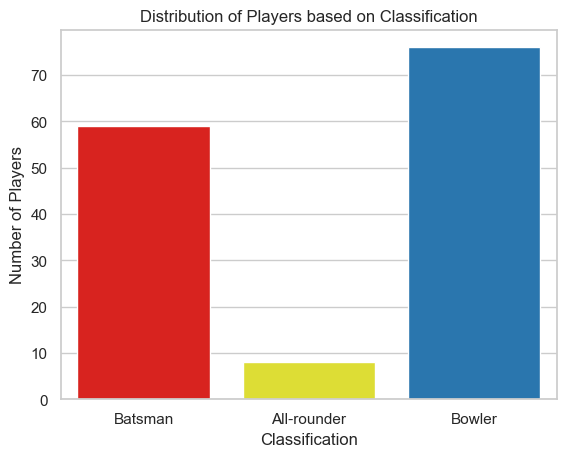

In [ ]:
sns.countplot(data=df,x='Classification',hue='Classification',palette=['#F70500','#F9F919','#147AC4'])
plt.ylabel("Number of Players")
plt.title("Distribution of Players based on Classification")
plt.show()

### <a id='toc1_3_3_'></a>[Batting Related Visualizations](#toc0_)

In [ ]:
# Top 20 run scorers
top_20_scores = df.sort_values(by='Runs',ascending=False).head(20)


#### <a id='toc1_3_3_1_'></a>[Top 20 Run Scores](#toc0_)


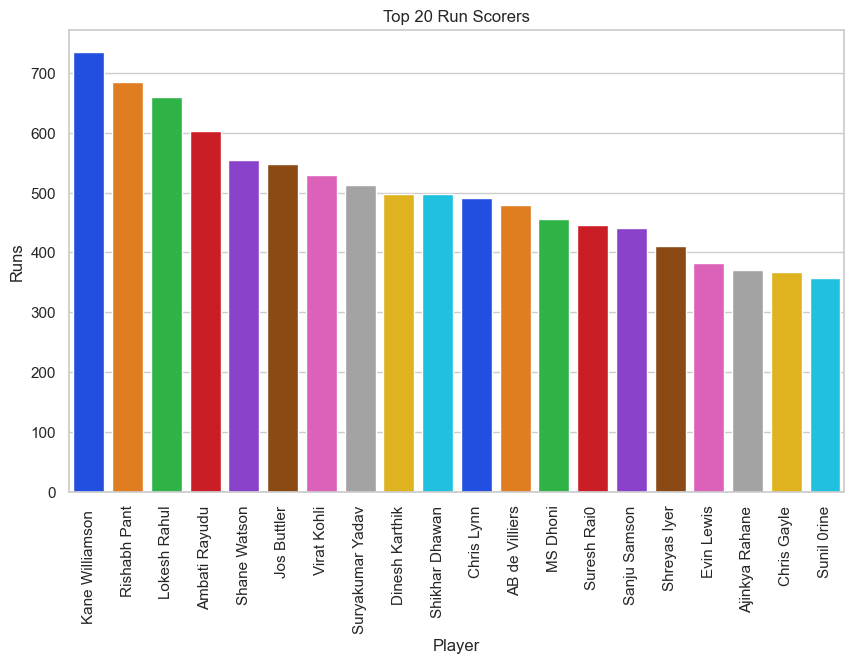

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_20_scores,x='Player',y='Runs',hue='Player',palette='bright')
plt.xticks(rotation=90)
plt.title("Top 20 Run Scorers")
plt.show()

#### <a id='toc1_3_3_2_'></a>[Contribution of top 10 scorers in the total runs scored](#toc0_)

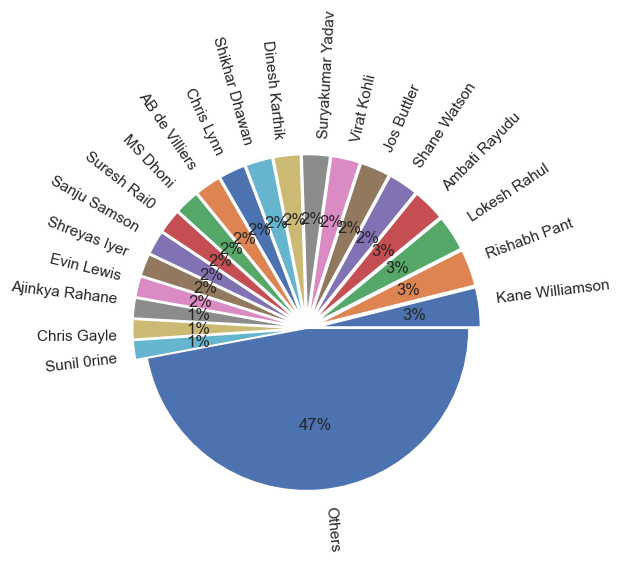

In [ ]:
scores = top_20_scores.head(20)[["Player",'Runs']]
totalScores = df['Runs'].sum()

runs = scores['Runs'].tolist() + [totalScores - scores['Runs'].sum()]
names = scores['Player'].tolist() + ["Others"]


plt.pie(x=runs,labels=names,autopct="%d%%",radius=1.4,rotatelabels=True,explode=[0.1 for i in range(20)]+[0])
# axs[0,1].pie( )
plt.axis('equal')

plt.show()

The top 20 scorers account for 53% of the total runs scored in the IPL season

#### <a id='toc1_3_3_3_'></a>[Players with the top 20 strike rates](#toc0_)

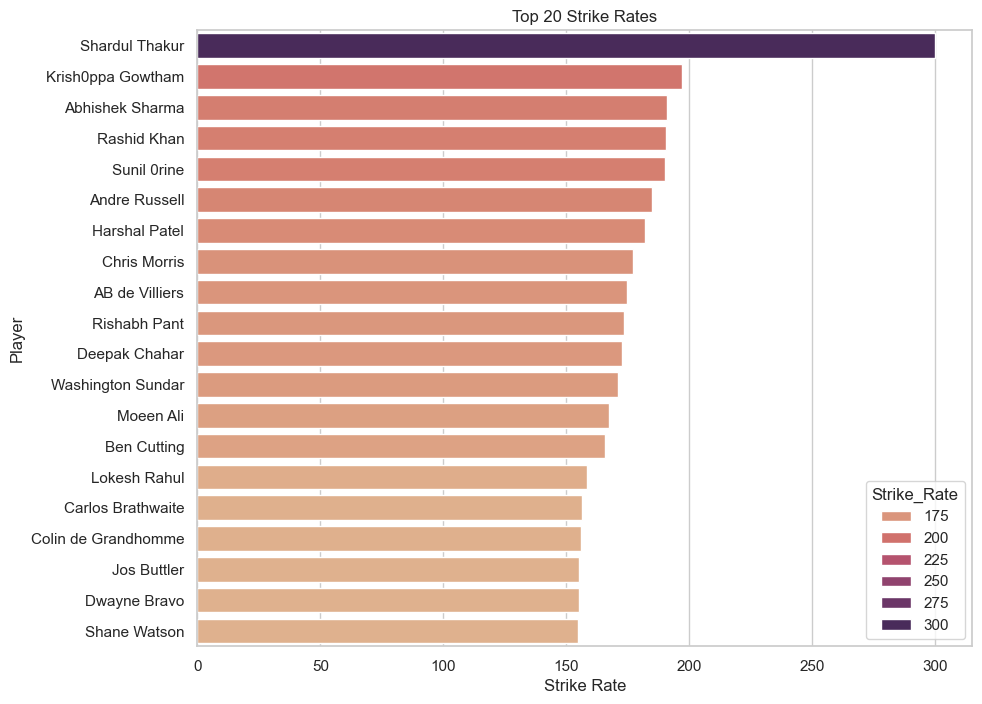

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df.sort_values(by='Strike_Rate', ascending=False).head(20), x='Strike_Rate', y='Player',hue='Strike_Rate',palette='flare')
plt.xlabel('Strike Rate')
plt.ylabel('Player')
plt.title('Top 20 Strike Rates')
plt.show()

It can be observed that the players who score the most overall are not necessarily the ones who score the fastest. However some names appear in both.


1.   AB de Villiers
2.   Rishabh Pant
3. Chris Morris
4. Jos Buttler
5. Shane Watson



#### <a id='toc1_3_3_4_'></a>[Runs vs Balls Faced](#toc0_)

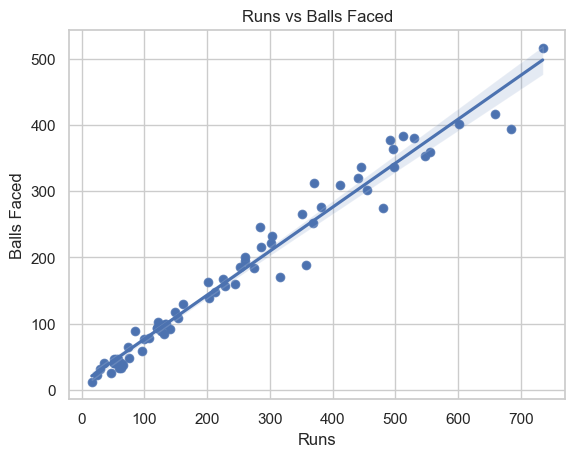

In [ ]:
sns.scatterplot(data=batting_data,x='Runs',y="Balls_Faced")
sns.regplot(data=batting_data,x='Runs',y='Balls_Faced') ## Found the best possible solution

plt.ylabel("Balls Faced")
plt.title("Runs vs Balls Faced")
plt.show()

Majority players are grouped together at lower runs and fewer balls faced, where as the performing players decrease as number of balls faced increases.

#### <a id='toc1_3_3_5_'></a>[Strike rate vs Batting Average](#toc0_)

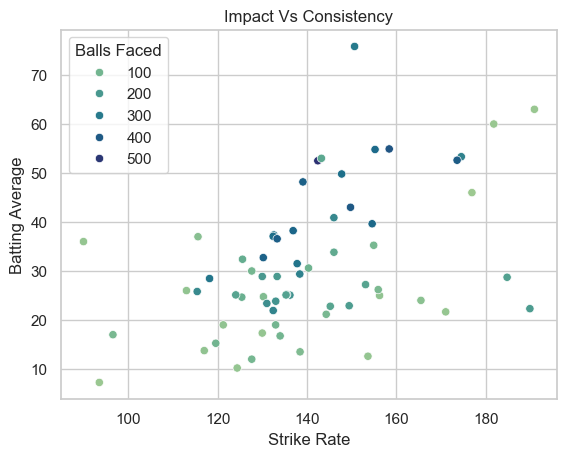

In [ ]:
sns.scatterplot(data=batting_data,x='Strike_Rate',y='Bat_Avg',hue='Balls_Faced',palette='crest')
plt.xlabel("Strike Rate")
plt.ylabel("Batting Average")
plt.legend(title='Balls Faced')
plt.title("Impact Vs Consistency")
plt.show()

The data points in the lower region show the impact players who face less balls but keep a very high strike rate but do not have higher batting average. On the other hand, those players with a higher batting average, maintain a moderate strike rate while facing more Balls

#### <a id='toc1_3_3_6_'></a>[Stacked Bar chart for Centuries and Half Centuries for top 20 scores](#toc0_)

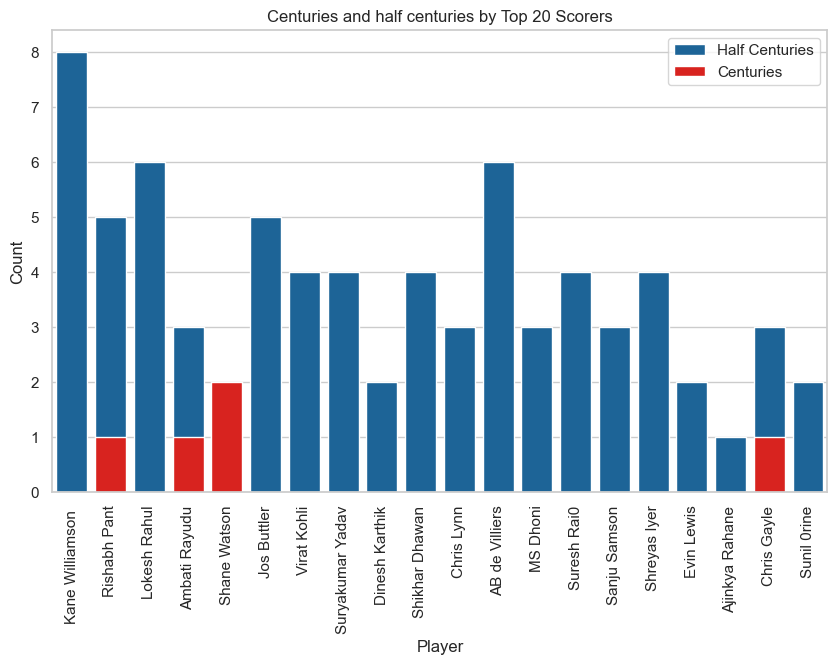

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_20_scores,x='Player',y='Half_Centuries',label="Half Centuries",color='#0967AB')
sns.barplot(data=top_20_scores,x='Player',y='Centuries',label="Centuries",color='#F70500')
plt.xticks(rotation=90)
plt.title("Centuries and half centuries by Top 20 Scorers")
plt.ylabel("Count")
plt.legend()
plt.show()

#### <a id='toc1_3_3_7_'></a>[Stacked Bar Chart for Four and Six hitters in top 20 Scorers](#toc0_)

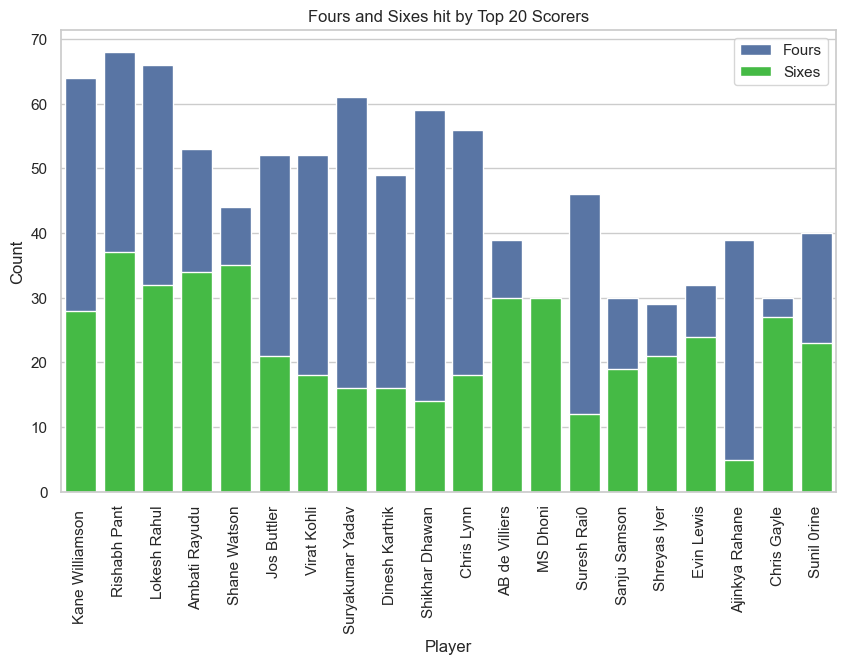

In [ ]:
top_20_scores = df.sort_values(by='Runs',ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(data=top_20_scores,x='Player',y='Fours',label="Fours",)
sns.barplot(data=top_20_scores,x='Player',y='Sixes',label="Sixes",color="limegreen")
plt.xticks(rotation=90)
plt.title("Fours and Sixes hit by Top 20 Scorers")
plt.ylabel("Count")
plt.legend()
plt.show()

#### <a id='toc1_3_3_8_'></a>[Correlation between different Batting Parameters](#toc0_)

<Axes: >

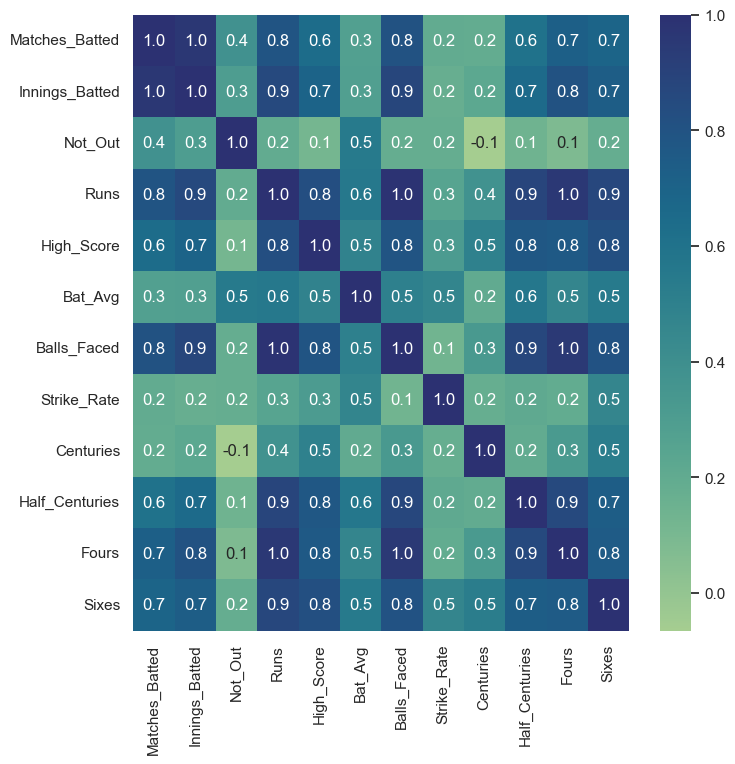

In [ ]:
corr_matr = batting_data[batting_columns[1:]].corr() # First column in batting_columns is PlayerName
plt.figure(figsize=(8,8))
sns.heatmap(corr_matr,annot=True,cmap='crest',fmt='.1f')

# corr_matr.to_numpy()

Notable Findings:
- Strong Correlation ( 0.7 to 1 )
   - Runs and Balls Faced have high positive correlation which means players who face more balls usually score more.
   - Runs and Fours also have high positive correlation, which means players who score more usually hit a higher number of fours. Similar properties can be observed for Sixes as well.
   - Balls Faced and Fours as well as Sixes have a high positive correlation, which means the players who stay longer usually hit more boundaries.
   - Fours and Sixes have a high positive correlation, indicating that players who hit more fours are very likely to hit sixes
- Weak Correlations ( -ve to 0.4)
  - Not Out and Centuries: Have negative correlation, meaning the number of not outs doesn't really predict the number of centuries. Same goes for all other properties
  - Half Centuries and Centuries: Have low correlation, which means players who score half centuries dont usually hit Centuries

### <a id='toc1_3_4_'></a>[Bowling Related Visualizations](#toc0_)

#### <a id='toc1_3_4_1_'></a>[Top 20 Wicket Taker](#toc0_)

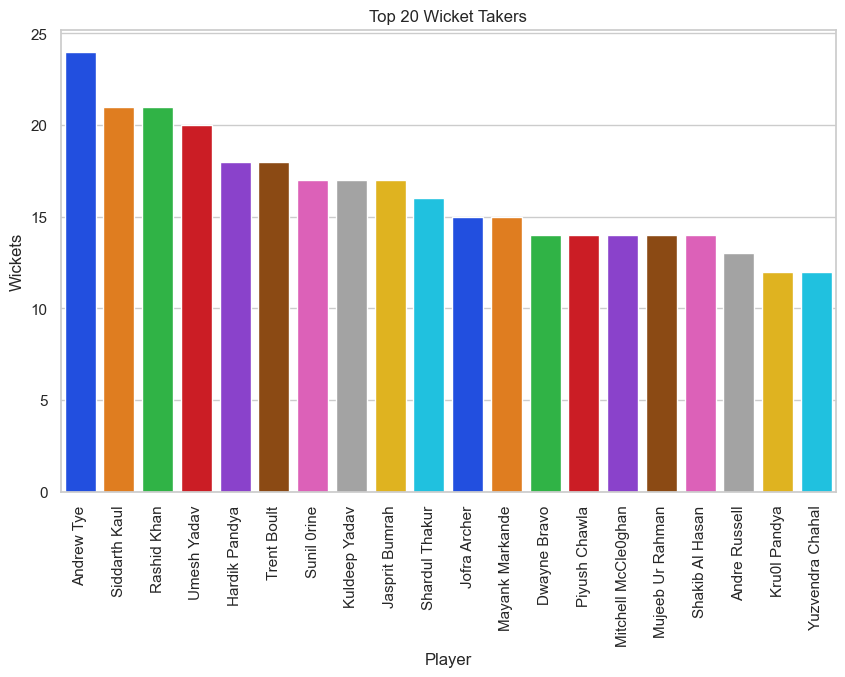

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values(by='Wickets',ascending=False).head(20),x='Player',y='Wickets',hue='Player',palette='bright')
plt.xticks(rotation=90)
plt.title("Top 20 Wicket Takers")
plt.show()

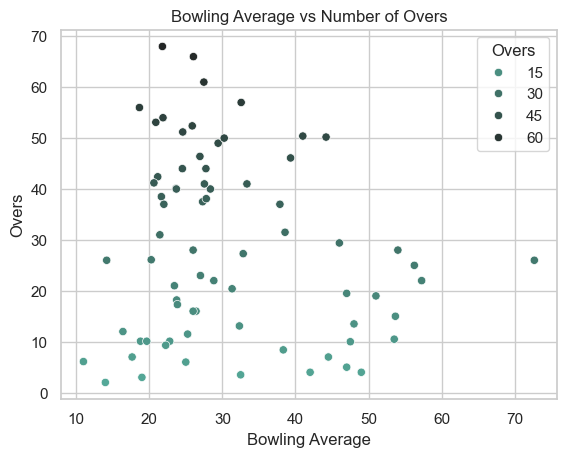

In [ ]:
## Players who had the best bowling average vs Number of overs

sns.scatterplot(data=bowling_data,x='Bowl_Avg',y="Overs",hue='Overs',palette=sns.color_palette("dark:#5A9_r", as_cmap=True))
plt.xlabel("Bowling Average")
plt.title("Bowling Average vs Number of Overs")
plt.show()

#### <a id='toc1_3_4_2_'></a>[Bowling Strike Rate vs Economy](#toc0_)

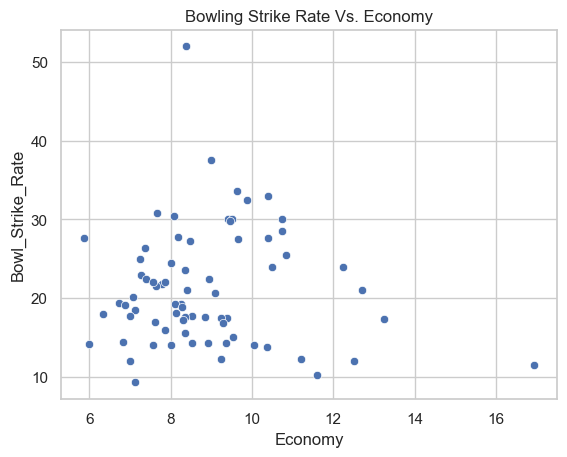

In [ ]:
sns.scatterplot(data=bowling_data,x='Economy',y='Bowl_Strike_Rate')
plt.title("Bowling Strike Rate Vs. Economy")
plt.show()

This graph highlights bowlers who have good economy and are frequent wicket takers (Bowling Strike Rate is inversely proportional to Wickets taken)
This graph shows that most of the players have a Strike rate below 40 and economy below 12. This means for each wicket, bowlers concede 40 runs or below.

#### <a id='toc1_3_4_3_'></a>[Wickets Taken vs Runs Conceded](#toc0_)

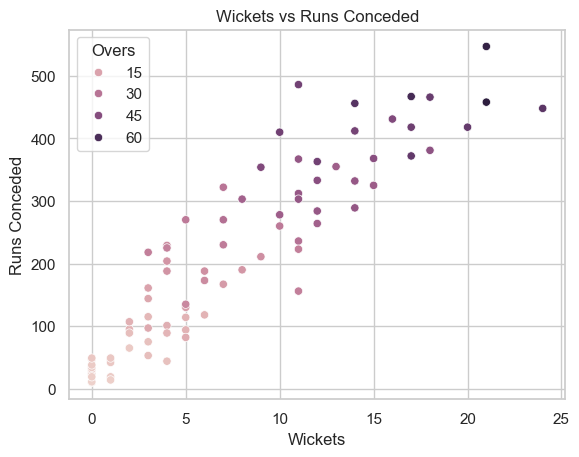

In [ ]:
# plt.figure(figsize=(10, 8))
sns.scatterplot(data=bowling_data, x='Wickets', y='Runs_Conceded',hue='Overs')
plt.xlabel('Wickets')
plt.ylabel('Runs Conceded')
plt.title('Wickets vs Runs Conceded')
plt.show()

Using this graph, we can understand divide the Bowlers in three categories:
1. High Overs, low wickets, high runs: Bowler is heavily used, but struggles with wicket taking
2. High Overs, high Wickets, low runs: Bowler is heavily used and is effective in both wicket taking and controlling runs
3. Low Overs, High Wickets, Low Runs: Bowler is impact player. Used for quick control of wickets and runs

#### <a id='toc1_3_4_4_'></a>[Overs Bowled vs. Wickets Taken](#toc0_)

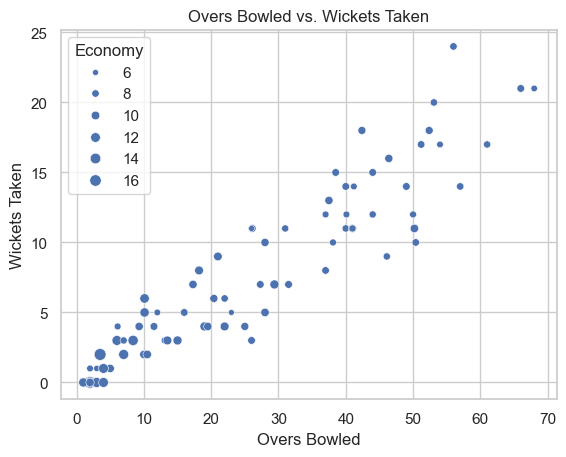

In [ ]:
sns.scatterplot(data=bowling_data, x='Overs', y='Wickets',size='Economy')
plt.xlabel('Overs Bowled')
plt.ylabel('Wickets Taken')
plt.title('Overs Bowled vs. Wickets Taken')

plt.show()

From this graph, we can interpret the following information
1. Efficiency: Bowlers in the upper part of graph with the small points are the most efficient, taking many wickets while maintaining low economy rate
2. Reliable Bowlers: Bowlers in the vertically-middle to middle-right are reliable bowlers. These bowlers maintain a good overs to wickets ratio. If the points are small, this means they are also keeping the economy in control
3. Impact Players: Points higher in the y-axis, but not farther in the x-axis are impact player, taking quick wickets. These bowlers are usually more expensive for economy and used to create pressure.

#### <a id='toc1_3_4_5_'></a>[Distribution of bowling averages](#toc0_)

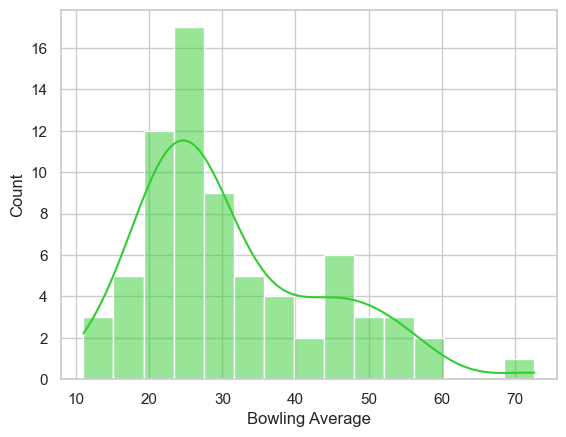

In [ ]:
sns.histplot(data=bowling_data,x='Bowl_Avg',bins=15,kde=True,color='limegreen',stat='count')
plt.xlabel("Bowling Average")
plt.show()

#### <a id='toc1_3_4_6_'></a>[Correlation between different Bowling Parameters](#toc0_)

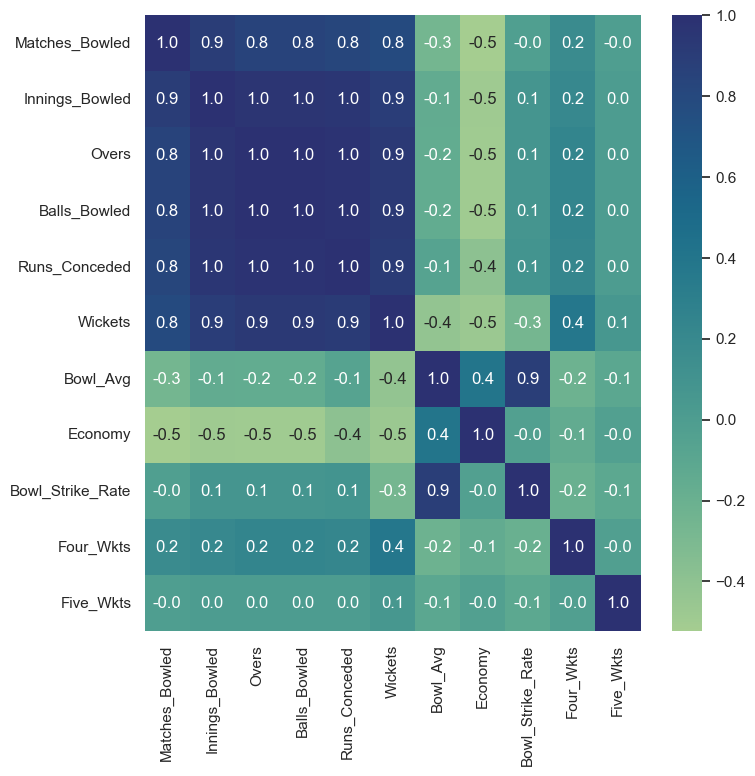

In [ ]:
corr_matr = bowling_data[bowling_columns[1:]].corr() # First column in bowling_columns is PlayerName
plt.figure(figsize=(8,8))
sns.heatmap(corr_matr,annot=True,cmap='crest',fmt='.1f')
plt.show()

Notable Findings:
- There is a strong correlation between Matches_Bowled, Innings_Bowled, Overs and Balls_Bowled. As over and balls bowled are derived from the others, while more matches/innings means more overs naturally bowled
- Wickets Taken have a strong positive correlation with Matches_Bowled, Overs as bowlers how bowl more take more wickets.
- Wickets have negative correlation with Bowl_Avg and Economy, which means more wickets lead to lower bowling average and Economy and vice versa. Similar understanding goes for Bowling strike rate
- Runs Conceded have a strong positive correlation with matches, overs, etc indicating that bowlers who bowl more tend to lose runs. Same goes for Economy.
- Conclusions: Features like Economy, Bowling Average, Bowling Strike Rate can be used for measuring performane of bowlers.

### <a id='toc1_3_5_'></a>[All-Rounder Related Charts](#toc0_)

#### <a id='toc1_3_5_1_'></a>[Listing the All-rounders](#toc0_)

In [ ]:
allrounders = df[df['Classification'] == 'All-rounder'].reset_index()
# Important stats/columns for all-rounders
allrounder_important_columns = [
    'Player',
    'Runs',
    'Bat_Avg',
    'High_Score',
    'Strike_Rate',
    'Wickets',
    'Runs_Conceded',
    'Bowl_Avg',
    'Economy',
    'Bowl_Strike_Rate',
    "Matches_Batted",
    "Matches_Bowled"
]

allrounders[allrounder_important_columns]

,Player,Runs,Bat_Avg,High_Score,Strike_Rate,Wickets,Runs_Conceded,Bowl_Avg,Economy,Bowl_Strike_Rate,Matches_Batted,Matches_Bowled
0,Andre Russell,316,28.72,88,184.79,13,355,27.30,9.38,17.46,16,16
1,Carlos Brathwaite,75,25.00,43,156.25,5,94,18.80,9.24,12.20,4,4
2,Hardik Pandya,260,28.88,50,133.33,18,381,21.16,8.92,14.22,13,13
3,Harshal Patel,60,60.00,36,181.81,7,167,23.85,9.54,15.00,5,5
4,Kru0l Pandya,228,22.80,41,145.22,12,284,23.66,7.07,20.08,14,14
5,Nitish Ra0,304,23.38,59,131.03,4,44,11.00,7.13,9.25,15,15
6,Sunil 0rine,357,22.31,75,189.89,17,467,27.47,7.65,21.52,16,16
7,Yusuf Pathan,260,28.88,45,130.00,1,14,14.00,7.00,12.00,15,15


#### <a id='toc1_3_5_2_'></a>[Batting Average Vs. Bowling Average](#toc0_)

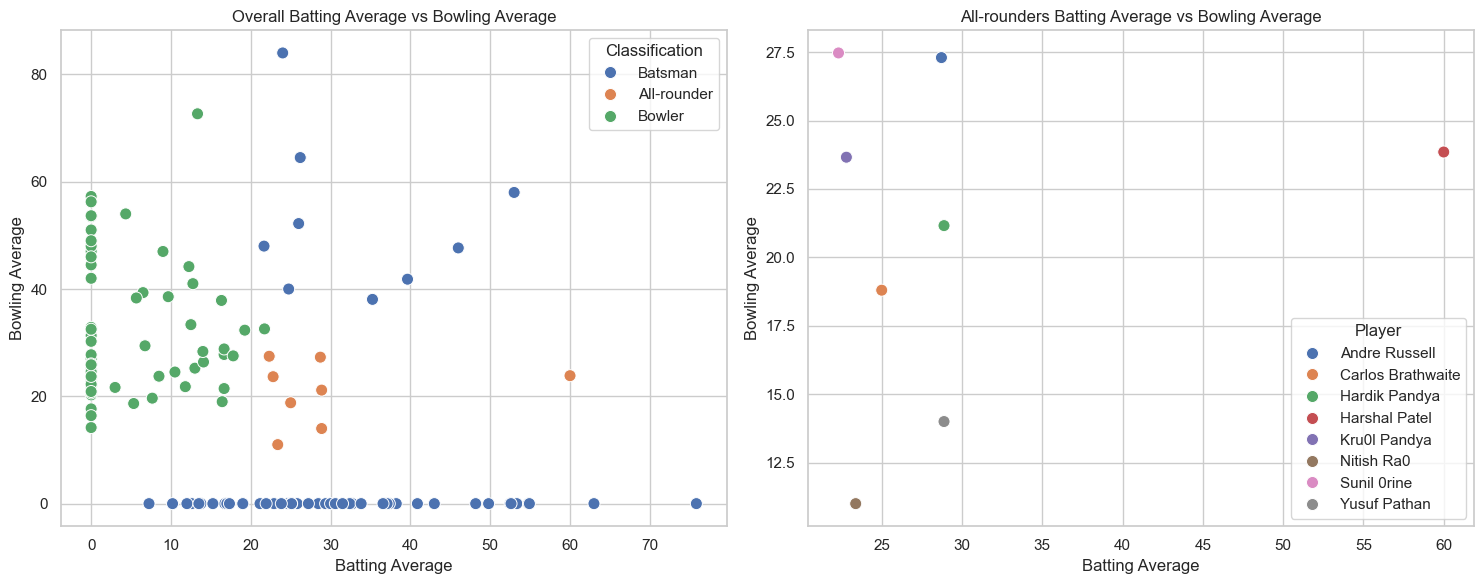

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(ax=axs[0],data=df,x='Bat_Avg',y='Bowl_Avg',hue='Classification',s=75)
axs[0].set_title("Overall Batting Average vs Bowling Average")

sns.scatterplot(ax=axs[1],data=allrounders,x='Bat_Avg',y='Bowl_Avg',hue='Player',s=75)
axs[1].set_title("All-rounders Batting Average vs Bowling Average")

axs[0].set_xlabel("Batting Average")
axs[1].set_xlabel("Batting Average")

axs[0].set_ylabel("Bowling Average")
axs[1].set_ylabel("Bowling Average")



fig.tight_layout()
plt.show()

From this graph, we can interpret the following information
1. Left chart
   1. Batsman are clustered at the bottom which indicates that they have high bowling averages but negligible or zero bowling averages. Higher batting average means better batsman.
   2. Bowlers are clustered at left which indicates that they have low batting averages as they specialize in batting. Lower bowling average means better bowlers.
   3. All-rounders are scattered in the middle, indicating that they have moderate batting and bowling averages. This is to be expected from all rounders
   4. Outliers: There are some non-all-rounders who have performed the task of the other specialization however the results aren't good enough to consider them all-rounders
2. Right Chart
   1. This chart shows the specializations of the all-rounders i.e. Balanced, Batsman All-rounder and Bowler All-rounder
   2. Yusuf Pathan is the most balanced all-rounder with strong performance in both, followed by Hardik Pandya and Carlos Brathwaite
   3. Harshal Patel is the most effective batsman with decent bowling average
   4. Nitish Rana is most effective bowler with decent batting average

#### <a id='toc1_3_5_3_'></a>[Strike Rate Comparisons](#toc0_)

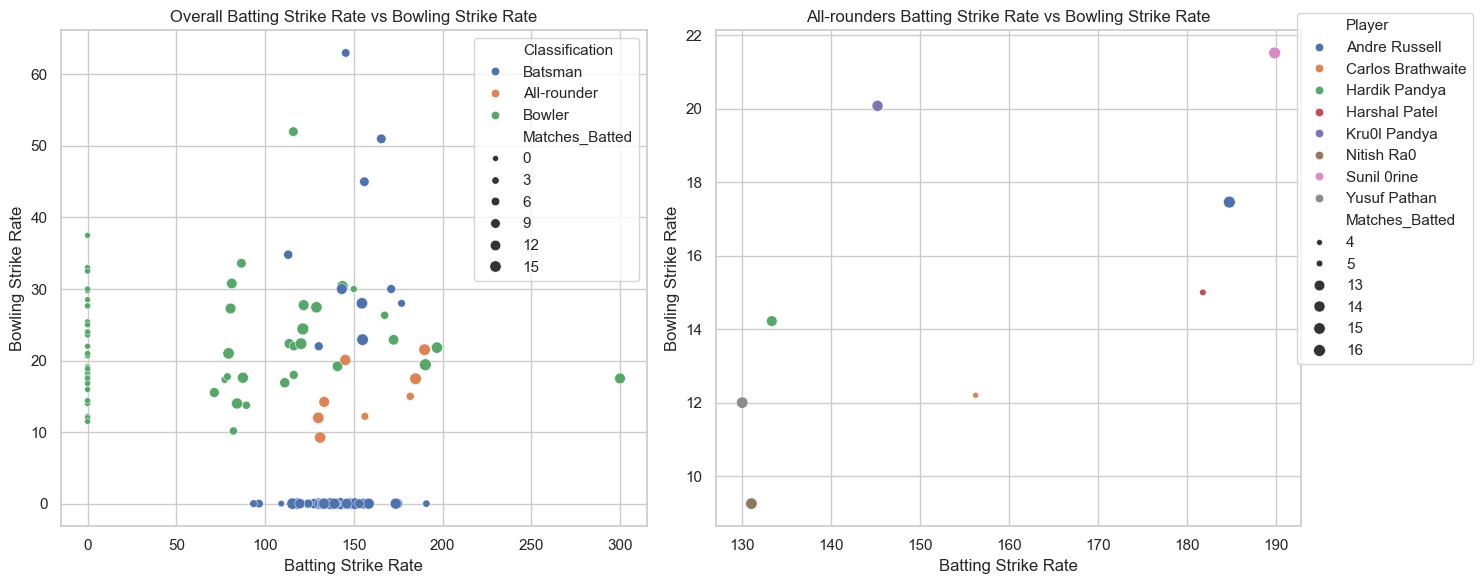

In [ ]:
# It can be seen that all all-rounder players have batted and bowled in all the matches

# ax = sns.scatterplot(data=allrounders,x='Strike_Rate',y='Bowl_Strike_Rate',hue='Player',size='Matches_Batted',)

# ax.set_title("All-rounders Batting Strike Rate vs Bowling Strike Rate")
# # Move legend outside the plot : Src=> https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot


fig,axs = plt.subplots(1,2,figsize=(15,6))

sns.scatterplot(ax=axs[0],data=df,x='Strike_Rate',y='Bowl_Strike_Rate',hue="Classification",size='Matches_Batted',)
axs[0].set_title("Overall Batting Strike Rate vs Bowling Strike Rate")

sns.scatterplot(ax=axs[1],data=allrounders,x='Strike_Rate',y='Bowl_Strike_Rate',hue='Player',size='Matches_Batted',)
axs[1].set_title("All-rounders Batting Strike Rate vs Bowling Strike Rate")

axs[0].set_xlabel("Batting Strike Rate")
axs[1].set_xlabel("Batting Strike Rate")

axs[0].set_ylabel("Bowling Strike Rate")
axs[1].set_ylabel("Bowling Strike Rate")

sns.move_legend(axs[1], "upper left", bbox_to_anchor=(.98, 1.05))
fig.tight_layout()
plt.show()

#### <a id='toc1_3_5_4_'></a>[Division of Play Time](#toc0_)

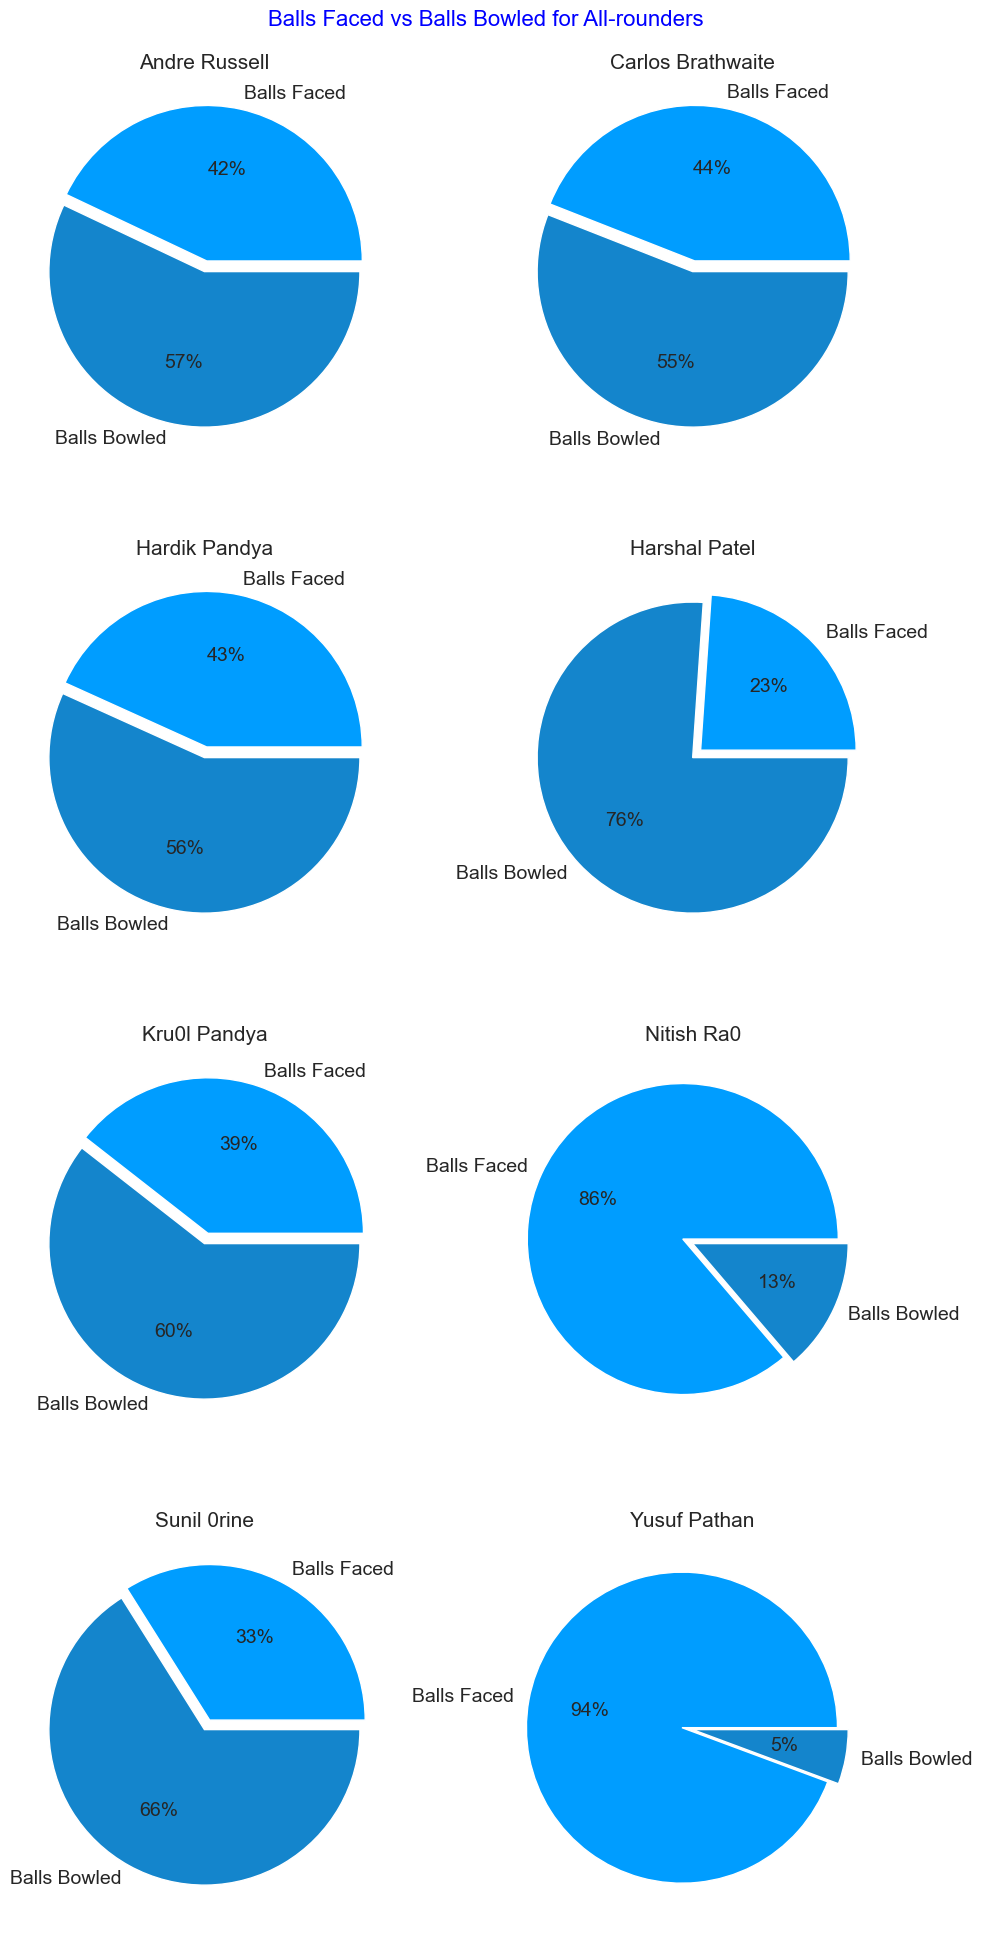

In [ ]:
nRows = len(allrounders) // 2 if len(allrounders) % 2 == 0 else len(allrounders) // 2 + 1

fig,axs = plt.subplots(nrows=nRows,ncols=2,figsize=(10,5*nRows))

for i in range(len(allrounders)):
  x = i // 2
  y = i % 2
  player = allrounders.iloc[i]
  balls = [player['Balls_Faced'],player['Balls_Bowled']]
  labels = ['Balls Faced','Balls Bowled']
  axs[x,y].pie(x=balls,labels=labels,autopct="%d%%",textprops={'fontsize': 14},explode=[0.07,0],startangle=0,colors=["#009DFF",'#1485CC'])
  axs[x,y].set_title(player['Player'],fontsize=15)


fig.suptitle("Balls Faced vs Balls Bowled for All-rounders",fontsize=16,color='blue')

fig.tight_layout()
plt.show()

## <a id='toc1_4_'></a>[Machine Learning and Data Prediction](#toc0_)

In [ ]:
# Data settings
splits = [0.3,0.3,0.25]
random_states = np.random.randint(1,100,3)

### <a id='toc1_4_1_'></a>[Linear Regression - Batting](#toc0_)

In [ ]:
# Select features and target variable
input_features_batting = ['Balls_Faced', 'Strike_Rate', 'Bat_Avg']
target_batting = 'Runs'

# Drop rows with missing values as stated before
X_batting = batting_data.dropna()[input_features_batting]
Y_batting = batting_data.dropna()[target_batting]


In [ ]:
# Split the data
X_train_batting, X_test_batting, Y_train_batting, Y_test_batting = train_test_split(X_batting, Y_batting, test_size=splits[0], random_state=random_states[0]) # 70% training and 30% testing

In [ ]:
# Create and train the model
model_batting = LinearRegression()
model_batting.fit(X_train_batting, Y_train_batting)

LinearRegression()

In [ ]:
y_pred_batting = model_batting.predict(X_test_batting)


mse = mean_squared_error(Y_test_batting, y_pred_batting)
print("Mean Squared Error:", mse)
r_squared = r2_score(y_true = Y_test_batting, y_pred=y_pred_batting)
print("R-squared:", r_squared)

Mean Squared Error: 513.5636623474642
R-squared: 0.9810842392001093


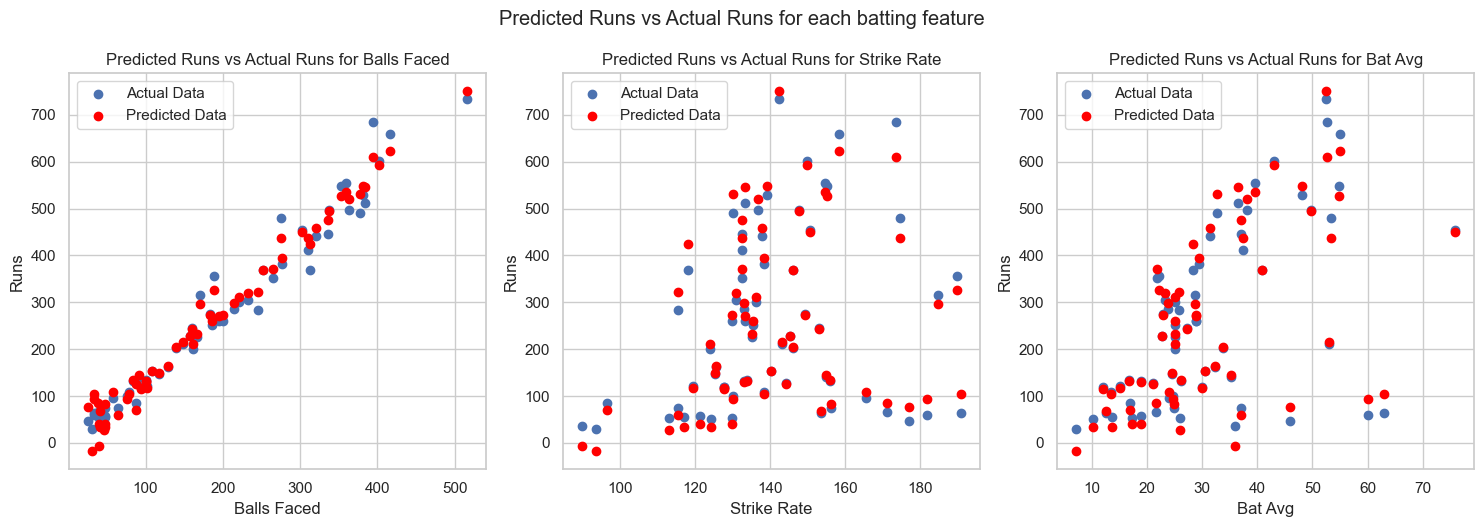

In [ ]:
# Visualizing the predictions for each feature
fig, axs = plt.subplots(nrows=1, ncols=len(X_batting.columns), figsize=(15, 5))

Y_pred_complete_batting = model_batting.predict(X_batting)

for i, col in enumerate(X_batting.columns):

    axs[i].scatter(X_batting[col], Y_batting, label='Actual Data')
    axs[i].scatter(X_batting[col], Y_pred_complete_batting, color='red', label='Predicted Data')

    corrected_name = ' '.join(col.split('_')) # Remove underscores
    axs[i].set_xlabel(corrected_name)
    axs[i].set_ylabel('Runs')
    axs[i].legend()
    axs[i].set_title(f'Predicted Runs vs Actual Runs for {corrected_name}')

fig.tight_layout()
fig.suptitle('Predicted Runs vs Actual Runs for each batting feature', y=1.05)
plt.show()


### <a id='toc1_4_2_'></a>[Linear Regression - Bowling](#toc0_)

In [ ]:
# Select features and target variable
input_features_bowling = ['Balls_Bowled', 'Bowl_Strike_Rate', 'Economy',"Bowl_Avg"]
target_bowling = 'Wickets'

# Drop rows with missing values as stated before
X_bowling = bowling_data.dropna()[input_features_bowling]
Y_bowling = bowling_data.dropna()[target_bowling]


In [ ]:
# Split the data
X_train_bowling, X_test_bowling, Y_train_bowling, Y_test_bowling = train_test_split(X_bowling, Y_bowling, test_size=splits[1], random_state=random_states[1]) # 70% training and 30% testing

In [ ]:
# Create and train the model
model_bowling = LinearRegression()
model_bowling.fit(X_train_bowling, Y_train_bowling)

LinearRegression()

In [ ]:
y_pred_bowling = model_bowling.predict(X_test_bowling)


mse = mean_squared_error(Y_test_bowling, y_pred_bowling)
print("Mean Squared Error:", mse)
r_squared = r2_score(y_true = Y_test_bowling, y_pred=y_pred_bowling)
print("R-squared:", r_squared)

Mean Squared Error: 3.576182719277929
R-squared: 0.9060329839234247


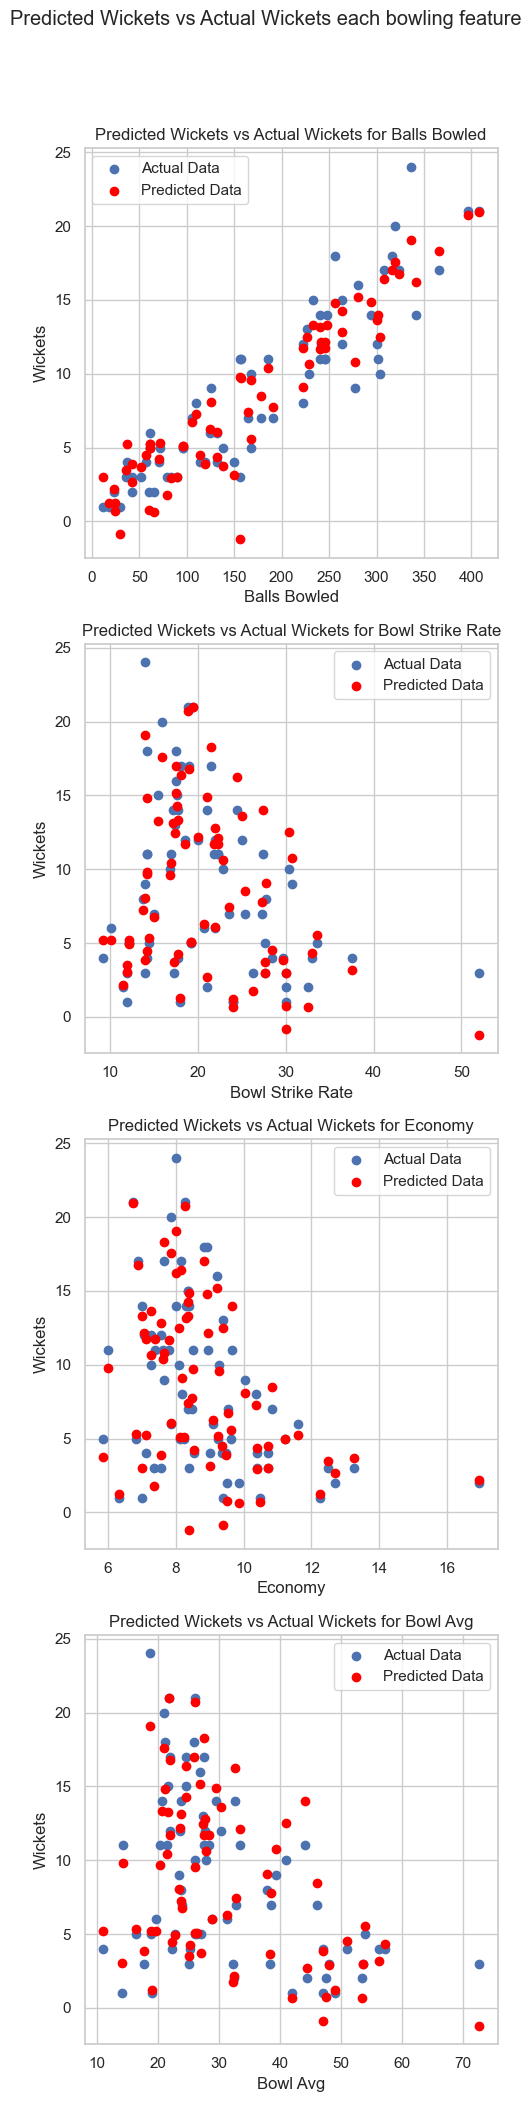

In [ ]:
# Visualizing the predictions for each feature
fig, axs = plt.subplots(nrows=len(X_bowling.columns), figsize=(5, 20))

Y_pred_complete_bowling = model_bowling.predict(X_bowling)

for i, col in enumerate(X_bowling.columns):

    axs[i].scatter(X_bowling[col], Y_bowling, label='Actual Data')
    axs[i].scatter(X_bowling[col], Y_pred_complete_bowling, color='red', label='Predicted Data')

    corrected_name = ' '.join(col.split('_')) # Remove underscores
    axs[i].set_xlabel(corrected_name)
    axs[i].set_ylabel('Wickets')
    axs[i].legend()
    axs[i].set_title(f'Predicted Wickets vs Actual Wickets for {corrected_name}')

fig.tight_layout()
fig.suptitle('Predicted Wickets vs Actual Wickets each bowling feature', y=1.05)
plt.show()


### <a id='toc1_4_3_'></a>[Logistic Regression : Player classification to Batsman, all-rounder, bowler](#toc0_)

Currently we are doing the classification by using heuristics and not the official classification methods. Assuming that we have classification in the dataset, we will simulate how Logistic Regression might be able to solve the classification

Preprocessing for Encoding the Classes
- Batsman : 0
- Bowler : 1
- All-rounder : 2

In [ ]:
df['Encoded_Classification'] = df['Classification'].map({'Batsman': 0, 'Bowler': 1, 'All-rounder': 2})

In [ ]:
# Verify the encoding
df[df['Classification']=="All-rounder"][['Player', 'Classification', 'Encoded_Classification']]

,Player,Classification,Encoded_Classification
6,Andre Russell,All-rounder,2
13,Carlos Brathwaite,All-rounder,2
33,Hardik Pandya,All-rounder,2
34,Harshal Patel,All-rounder,2
47,Kru0l Pandya,All-rounder,2
62,Nitish Ra0,All-rounder,2
89,Sunil 0rine,All-rounder,2
98,Yusuf Pathan,All-rounder,2


In [ ]:
# Select features and targets
input_features_classification = ['Bat_Avg', 'Bowl_Avg', 'Strike_Rate', 'Bowl_Strike_Rate', 'Economy']
target = 'Encoded_Classification'

X_classification = df.dropna()[input_features_classification]
Y_classification = df.dropna()[target]

In [ ]:
# Using StandardScaler to scale/fit/transform the input features
scaler = StandardScaler()
X_classification_scaled = scaler.fit_transform(X_classification)


Splitting the Classification data

In [ ]:
X_train_classification, X_test_classification, Y_train_classification, Y_test_classification = train_test_split(X_classification_scaled, Y_classification, test_size=splits[2], random_state=random_states[2]) # 70% training and 30% testing

In [ ]:
# Creating a logistic regression model
model_classification = LogisticRegression(max_iter=300)
model_classification.fit(X_train_classification, Y_train_classification)

LogisticRegression(max_iter=300)

Testing the model with test data

Accuracy: 0.90625


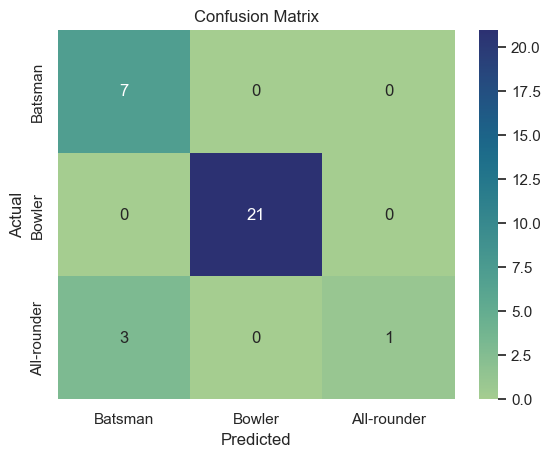

In [ ]:
y_pred_classification = model_classification.predict(X_test_classification)

accuracy = accuracy_score(Y_test_classification, y_pred_classification)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_test_classification, y_pred_classification)
# Visualizing the confusion matrix

## Labeling the heatmap with the confusion matrix | Src=> https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
sns.heatmap(conf_matrix, annot=True, cmap='crest',xticklabels=['Batsman', 'Bowler', 'All-rounder'], yticklabels=['Batsman', 'Bowler', 'All-rounder'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Testing the model with entire data

Accuracy: 0.937007874015748


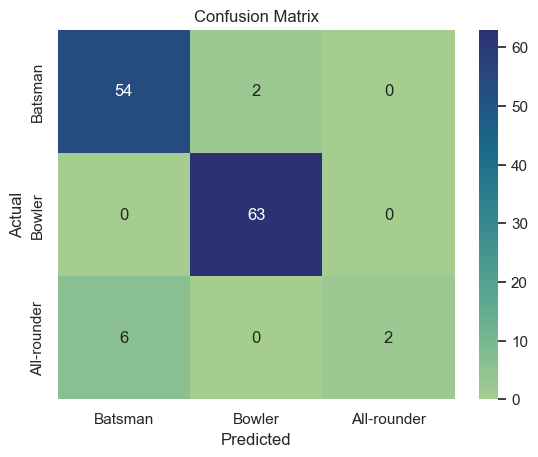

,Player,Matches_Batted,Innings_Batted,Not_Out,Runs,High_Score,Bat_Avg,Balls_Faced,Strike_Rate,Centuries,...,Wickets,Best_Bowling_Innings,Bowl_Avg,Economy,Bowl_Strike_Rate,Four_Wkts,Five_Wkts,Classification,Balls_Bowled,Encoded_Classification
6,Andre Russell,16,14,3,316,88,28.72,171,184.79,0,...,13,0,27.3,9.38,17.46,0,0,All-rounder,227,2
13,Carlos Brathwaite,4,4,1,75,43,25.00,48,156.25,0,...,5,0,18.8,9.24,12.20,0,0,All-rounder,61,2


In [ ]:
y_pred_complete_classification = model_classification.predict(X_classification_scaled)

temp = df.dropna()

accuracy = accuracy_score(Y_classification, y_pred_complete_classification)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(Y_classification, y_pred_complete_classification)
# Visualizing the confusion matrix

## Labeling the heatmap with the confusion matrix | Src=> https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
sns.heatmap(conf_matrix, annot=True, cmap='crest',xticklabels=['Batsman', 'Bowler', 'All-rounder'], yticklabels=['Batsman', 'Bowler', 'All-rounder'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

df.dropna()[y_pred_complete_classification == 2]

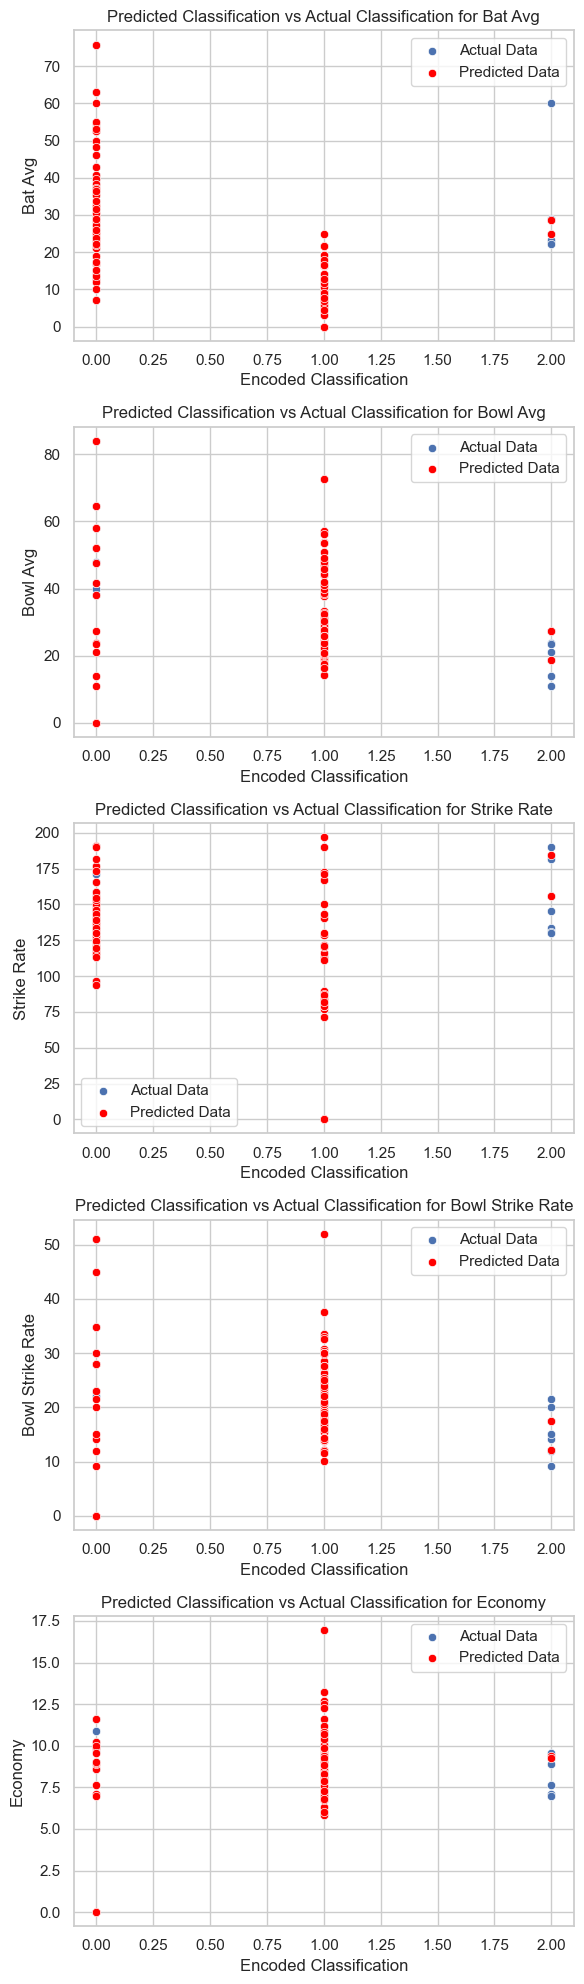

In [ ]:
# Visualizing the predictions for each feature
fig, axs = plt.subplots( nrows=len(X_classification.columns), figsize=(6,20))

for i, col in enumerate(X_classification.columns):
      sns.scatterplot(ax=axs[i],y=X_classification[col], x=Y_classification, label='Actual Data')
      sns.scatterplot(ax=axs[i],y=X_classification[col], x=y_pred_complete_classification, color='red', label='Predicted Data')
      corrected_name = ' '.join(col.split('_')) # Remove underscores
      axs[i].set_xlabel("Encoded Classification")
      axs[i].set_ylabel(corrected_name)
      axs[i].legend()
      axs[i].set_title(f'Predicted Classification vs Actual Classification for {corrected_name}')

fig.tight_layout()
plt.show()

## <a id='toc1_5_'></a>[Users inputs for model predictions](#toc0_)

Helper functions

In [ ]:
def get_input(prompt:str,input_type=str):
  """Get the user from the input

  Args:
      prompt (str): The prompt you wish to show the user
      input_type (_type_, optional): The data type you want to parse you result in. Defaults to str.

  Returns:
      input_type: Returns the input of the user in appropriate datatype
  """
  while True:
    try:
      return input_type(input(prompt))
    except ValueError:
      print("Invalid input. Please try again.")
      print()

In [ ]:
def getBattingInput():
    """Gets batting input from the user and returns a pandas DataFrame.

    Prompts the user for the number of balls faced, strike rate, and batting average.
    Returns a pandas DataFrame with columns 'Balls_Faced', 'Strike_Rate', and 'Bat_Avg'.

    Returns:
        pd.DataFrame: A DataFrame containing a row of batting input.
    """
    balls_faced = get_input("Enter the number of balls faced: ", int)
    strike_rate = get_input("Enter the strike rate: ", float)
    bat_avg = get_input("Enter the batting average: ", float)

    # Tried this but makes a 1D array
    # return pd.DataFrame(data=[balls_faced,strike_rate,bat_avg],columns=['Balls_Faced','Strike_Rate','Bat_Avg'])

    # Opted to use this instead of dict for simplicity

    return pd.DataFrame(data=[[balls_faced, strike_rate, bat_avg]], columns=['Balls_Faced', 'Strike_Rate', 'Bat_Avg'])

def getBowlingInput():
    """Gets bowling input from the user and returns a pandas DataFrame.

    Prompts the user for the number of balls bowled, bowling strike rate, economy rate, and bowling average.
    Returns a pandas DataFrame with columns 'Balls_Bowled', 'Bowl_Strike_Rate', 'Economy', and 'Bowl_Avg'.

    Returns:
        pd.DataFrame: A DataFrame containing a row of bowling input.
    """
    balls_bowled = get_input("Enter the number of balls bowled: ", int)
    bowl_strike_rate = get_input("Enter the bowling strike rate: ", float)
    economy = get_input("Enter the economy rate: ", float)
    bowling_average = get_input("Enter the bowling average: ", float)

    # Opted to use this instead of dict for simplicity
    return pd.DataFrame(data=[[balls_bowled, bowl_strike_rate, economy, bowling_average]], columns=['Balls_Bowled', 'Bowl_Strike_Rate', 'Economy', 'Bowl_Avg'])

def getClassificationInput():
    """Gets classification input from the user and returns scaled data.

    Prompts the user for batting average, bowling average, batting strike rate, bowling strike rate, and economy rate.
    Creates a pandas DataFrame, scales the data, and returns the scaled data.

    Returns:
        np.ndarray: Scaled data for classification.
    """
    bat_avg = get_input("Enter the batting average: ", float)
    bowl_avg = get_input("Enter the bowling average: ", float)
    strike_rate = get_input("Enter the batting strike rate: ", float)
    bowl_strike_rate = get_input("Enter the bowling strike rate: ", float)
    economy = get_input("Enter the economy rate: ", float)

    inp_data = pd.DataFrame(data=[[bat_avg, bowl_avg, strike_rate, bowl_strike_rate, economy]], columns=['Bat_Avg', 'Bowl_Avg', 'Strike_Rate', 'Bowl_Strike_Rate', 'Economy'])

    ## Scaling the data to match the inputs for Classification model
    scaled_data = scaler.fit_transform(inp_data)
    return scaled_data


### <a id='toc1_5_1_'></a>[Batting Prediction](#toc0_)

In [ ]:
# # Get User Input for Batting
# print("Starting Batting Prediction")
# print("--------------------------")
# print("Example Data:")
# print({'Balls_Faced': 215.0, 'Strike_Rate': 133.02, 'Bat_Avg': 23.83},'| Runs:',286,'\n')

# print("Enter the player's batting statistics:")
# # print("--------------------------------------")
# batting_input = getBattingInput()

# # Predict the runs
# batting_prediction = model_batting.predict(batting_input)
# print("Predicted Runs:", batting_prediction[0])

In [ ]:
allrounders.iloc[0][input_features_classification].to_dict()

{'Bat_Avg': 28.72,
 'Bowl_Avg': 27.3,
 'Strike_Rate': 184.79,
 'Bowl_Strike_Rate': 17.46,
 'Economy': 9.38}

### <a id='toc1_5_2_'></a>[Bowling Prediction](#toc0_)

In [ ]:
# # Get User Input for Bowling
# print("Starting Bowling Prediction")
# print("--------------------------")
# print("Example Data:")
# print({'Balls_Bowled': 156.0, 'Bowl_Strike_Rate': 14.18, 'Economy': 6.0},'| Wickets:',11,'\n')

# print("Enter the player's bowling statistics:")
# print("--------------------------------------")
# bowling_input = getBowlingInput()

# # Predict the wickets
# bowling_prediction = model_bowling.predict(bowling_input)
# print("Predicted Wickets:", bowling_prediction[0])

### <a id='toc1_5_3_'></a>[Player Classification](#toc0_)

In [ ]:
# # Get User Input for Classification
# print("Starting Player Classification")
# print("------------------------------")
# print("Example Data:")
# print({'Bat_Avg': 28.72,
#  'Bowl_Avg': 27.3,
#  'Strike_Rate': 184.79,
#  'Bowl_Strike_Rate': 17.46,
#  'Economy': 9.38},'| Classification:','All-rounder','\n')

# print("Enter the player's statistics for classification:")
# print("-------------------------------------------------")
# classification_input = getClassificationInput()

# # Predict the classification
# encoded_classification_prediction = model_classification.predict(classification_input)
# classification_prediction = ['Batsman',"Bowler","All-rounder"][encoded_classification_prediction[0]]
# print("Predicted Classification:", classification_prediction)

In [ ]:
# Step 2

X = batting_data.drop(columns=['Player','Runs'])
Y = batting_data['Runs']

In [ ]:
# Step 3
X.replace('-',pd.NA,inplace=True)
batting_cleaned = pd.concat([X,Y],axis=1)
X_cleaned = batting_cleaned.drop(columns=['Runs'])
y_cleaned = batting_cleaned['Runs']

In [ ]:
# Step 5 : Splitting
X_train,X_test,Y__train,Y_test = train_test_split(X_cleaned,y_cleaned,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=.95) # preserving 95% of data for varianc

X_train_pca = pca.fit_transform(X_train_scaled)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values